In [1]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(rc={'figure.figsize':(20,8.27)})

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SoultySprings/lung-capacity-eda/master/EDA/LungCapData.csv')
df

,Unnamed: 0,LungCap,Age,Height,Smoke,Gender,Caesarean
0,1,6.475,6,62.1,no,male,no
1,2,10.125,18,74.7,yes,female,no
2,3,9.550,16,69.7,no,female,yes
3,4,11.125,14,71.0,no,male,no
4,5,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...,...
720,721,5.725,9,56.0,no,female,no
721,722,9.050,18,72.0,yes,male,yes
722,723,3.850,11,60.5,yes,female,no
723,724,9.825,15,64.9,no,female,no


In [3]:
cols = df.columns
df.info()
print(cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  725 non-null    int64  
 1   LungCap     725 non-null    float64
 2   Age         725 non-null    int64  
 3   Height      725 non-null    float64
 4   Smoke       725 non-null    object 
 5   Gender      725 non-null    object 
 6   Caesarean   725 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 39.8+ KB
Index(['Unnamed: 0', 'LungCap', 'Age', 'Height', 'Smoke', 'Gender',
       'Caesarean'],
      dtype='object')


In [4]:
df = df.drop(columns='Unnamed: 0')
cols = df.columns

In [5]:
smo_ceanumeric = {'no':0,'yes':1}
gendernumeric = {'male': 0, 'female': 1}
df

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [6]:
dfNum = df.copy()
dfNum['Smoke'] = df['Smoke'].map(smo_ceanumeric).copy()
dfNum['Caesarean'] = df['Caesarean'].map(smo_ceanumeric)
dfNum['Gender'] = df['Gender'].map(gendernumeric)
dfNum.corr()

,LungCap,Age,Height,Smoke,Gender,Caesarean
LungCap,1.000000,0.819675,0.912187,0.101374,-0.169823,0.021317
Age,0.819675,1.000000,0.835737,0.211232,0.030312,0.056339
Height,0.912187,0.835737,1.000000,0.176534,-0.141441,0.060397
Smoke,0.101374,0.211232,0.176534,1.000000,0.053528,0.038330
Gender,-0.169823,0.030312,-0.141441,0.053528,1.000000,-0.013070
Caesarean,0.021317,0.056339,0.060397,0.038330,-0.013070,1.000000


In [7]:
for value in cols:

    percent = round((1-(df[value].nunique()/df[value].count()))*100,5)
    print(f'{value:<10} : '
          f'{df[value].count():>5} : '
          f'{df[value].nunique():>5} : '
          f'{percent:>5}\n')

    print(df[value].value_counts(), '\n\n')

LungCap    :   725 :   342 : 52.82759

LungCap
8.350    8
8.000    7
8.775    7
7.825    7
6.450    7
        ..
3.600    1
5.275    1
7.075    1
7.175    1
3.850    1
Name: count, Length: 342, dtype: int64 


Age        :   725 :    17 : 97.65517

Age
13    69
12    68
15    64
11    58
14    56
16    54
10    51
17    43
18    43
8     41
9     40
7     37
19    37
6     25
5     20
3     13
4      6
Name: count, dtype: int64 


Height     :   725 :   274 : 62.2069

Height
65.4    8
69.3    7
65.5    7
67.5    7
63.3    7
       ..
51.2    1
75.0    1
48.9    1
48.8    1
66.7    1
Name: count, Length: 274, dtype: int64 


Smoke      :   725 :     2 : 99.72414

Smoke
no     648
yes     77
Name: count, dtype: int64 


Gender     :   725 :     2 : 99.72414

Gender
male      367
female    358
Name: count, dtype: int64 


Caesarean  :   725 :     2 : 99.72414

Caesarean
no     561
yes    164
Name: count, dtype: int64 




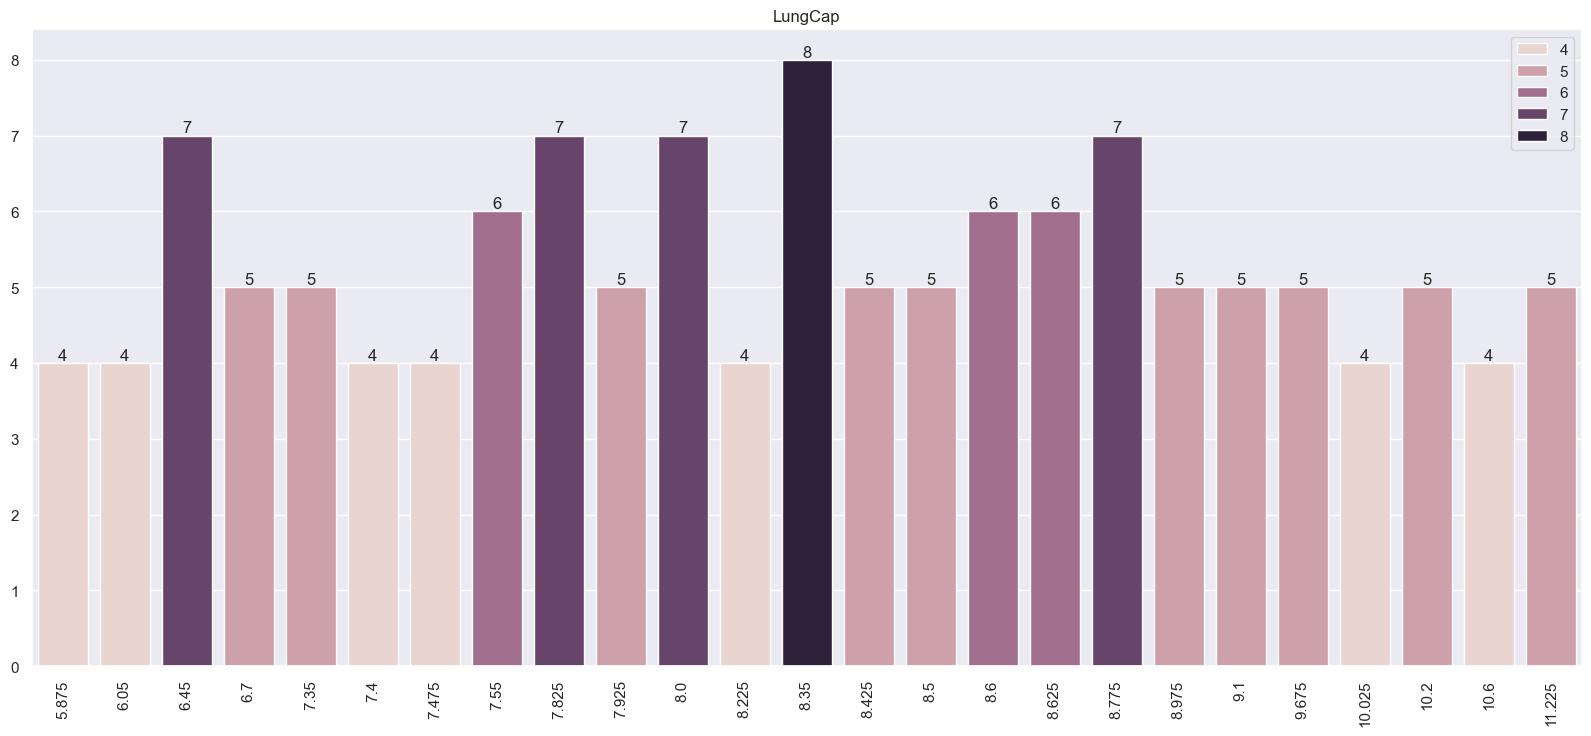

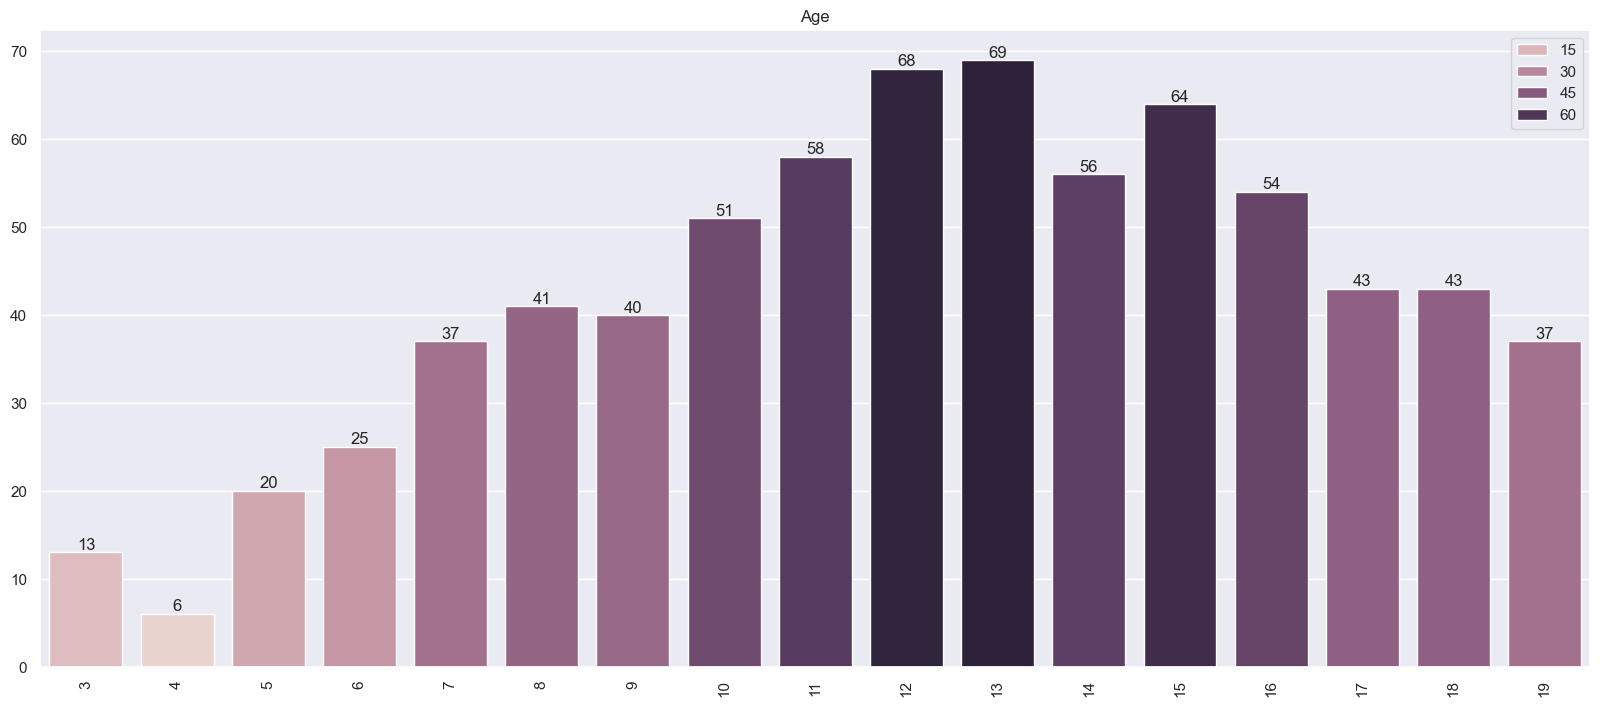

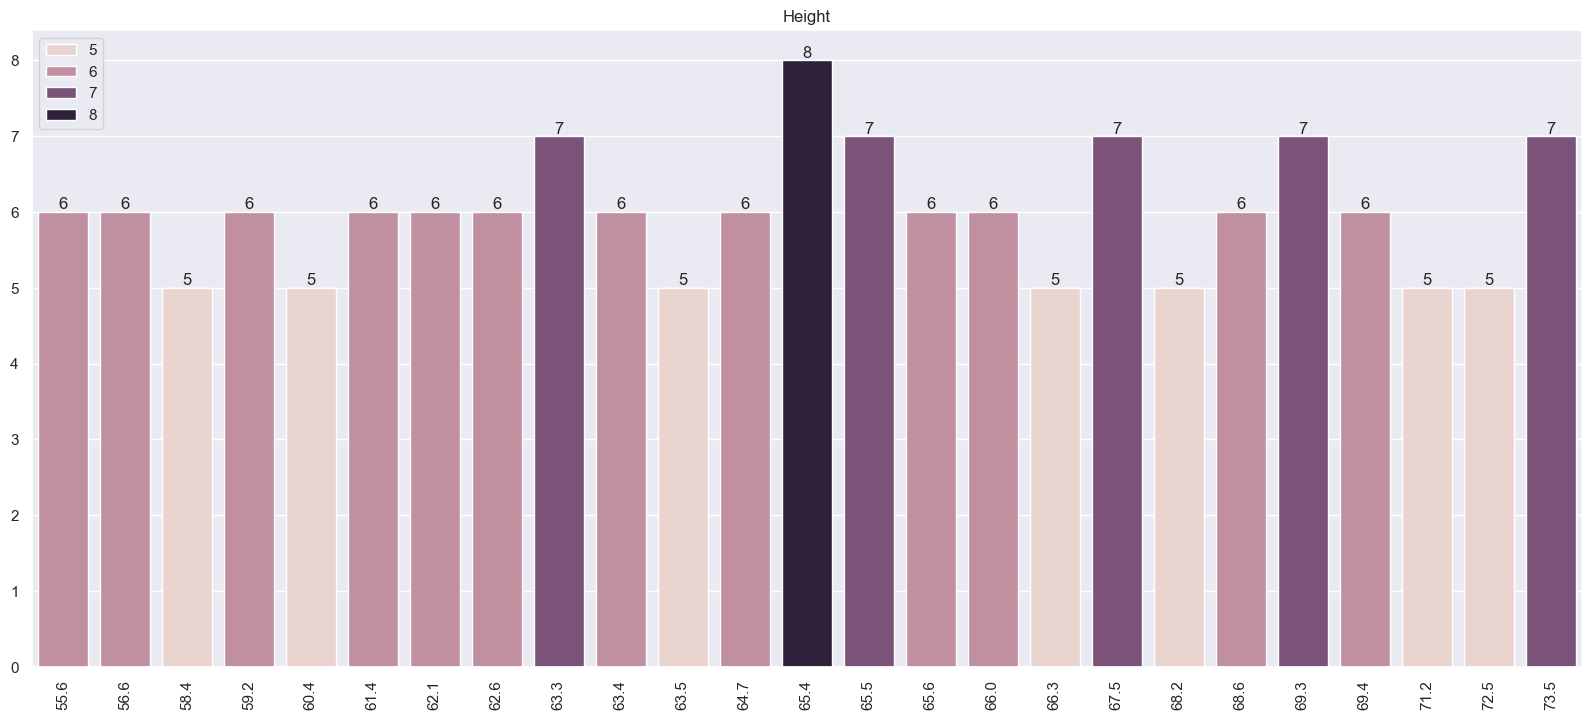

In [8]:
colsN = ['LungCap','Age','Height']
for value in colsN:
    mydict = df[value].value_counts().head(25).to_dict()
    plt.figure()
    figBar = sns.barplot(data=mydict, x=mydict.keys(), y=mydict.values(), hue=mydict.values(), errorbar=('ci', False))
    plt.xticks(rotation=90)
    for container in figBar.containers:
        figBar.bar_label(container)
    figBar.set_title(f"{value}")

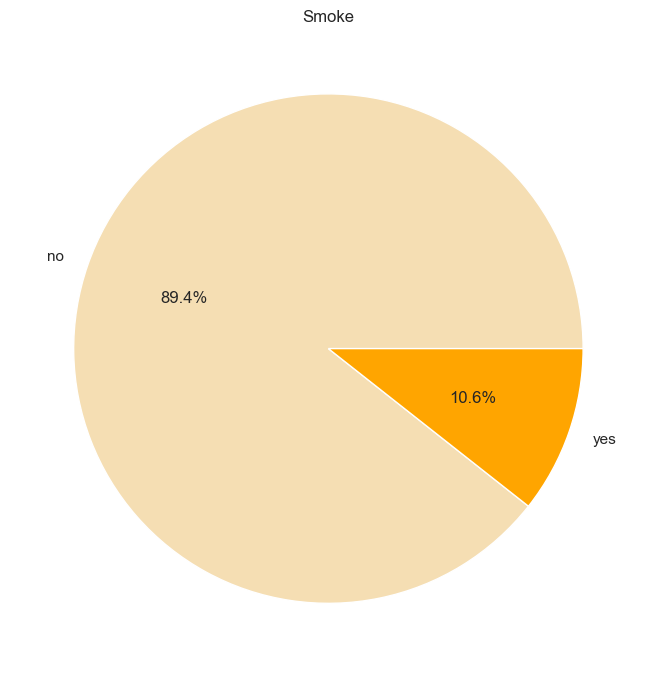

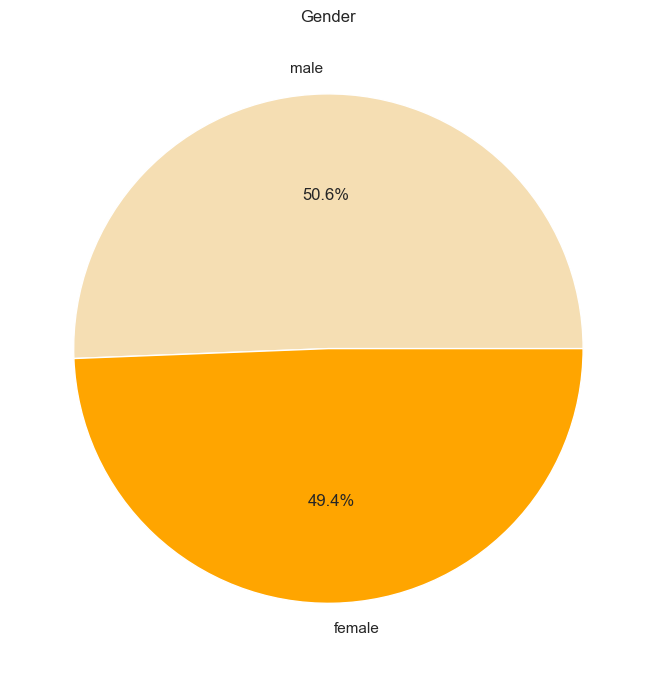

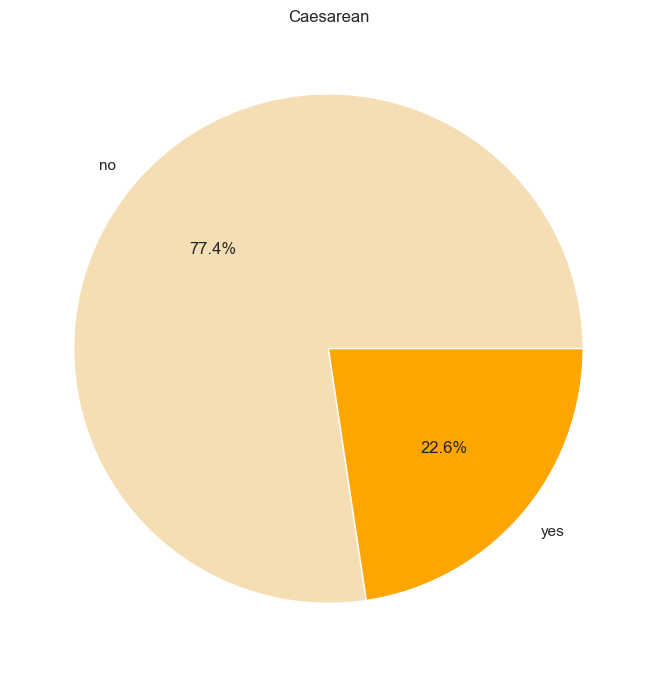

In [9]:
colsN = ['Smoke','Gender','Caesarean']
for value in colsN:
    mydict = df[value].value_counts().head(20).to_dict()
    plt.figure()
    figPie = plt.pie(mydict.values(), labels=mydict, colors=['wheat','orange'], autopct='%1.1f%%')
    plt.xticks(rotation=90)
    plt.title(f'{value}')

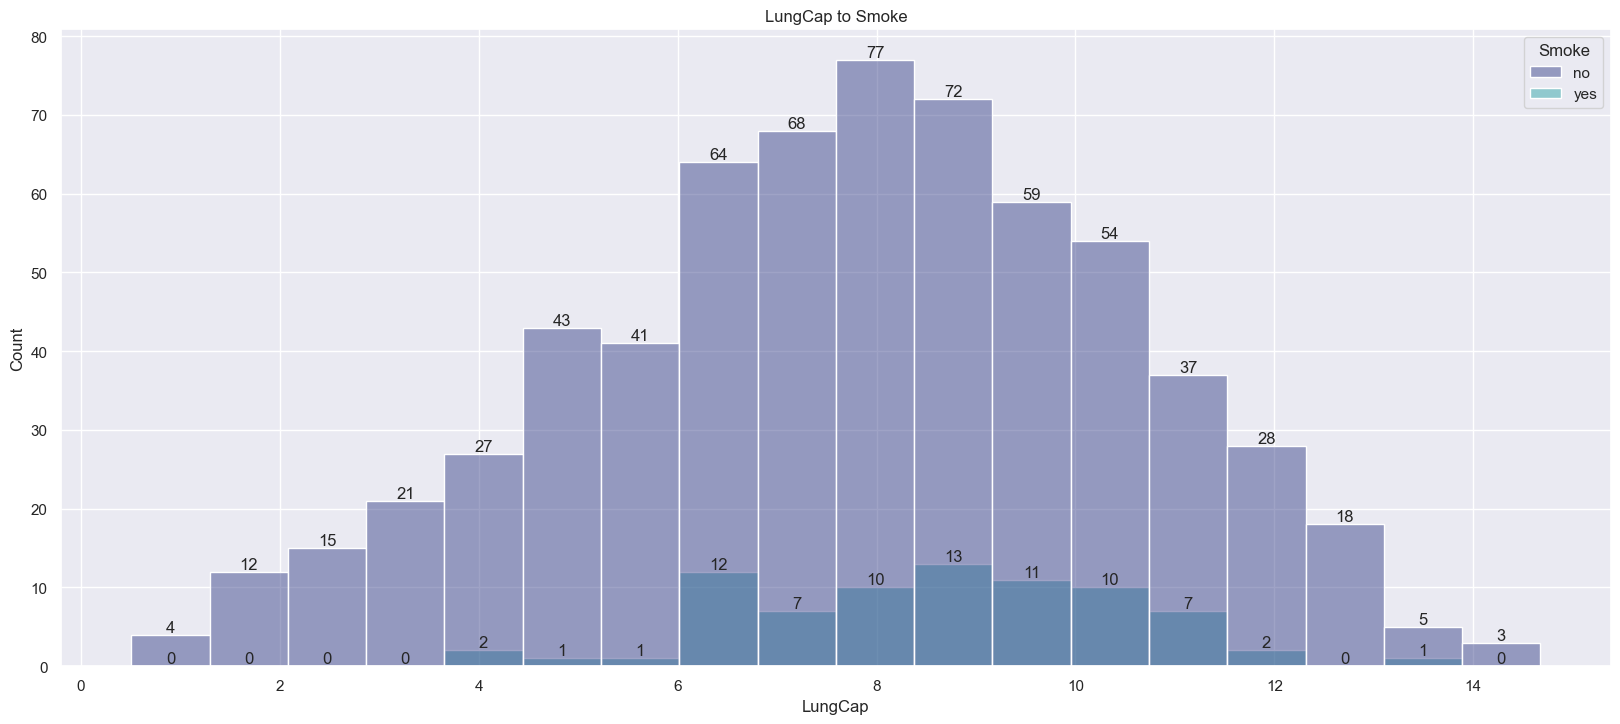

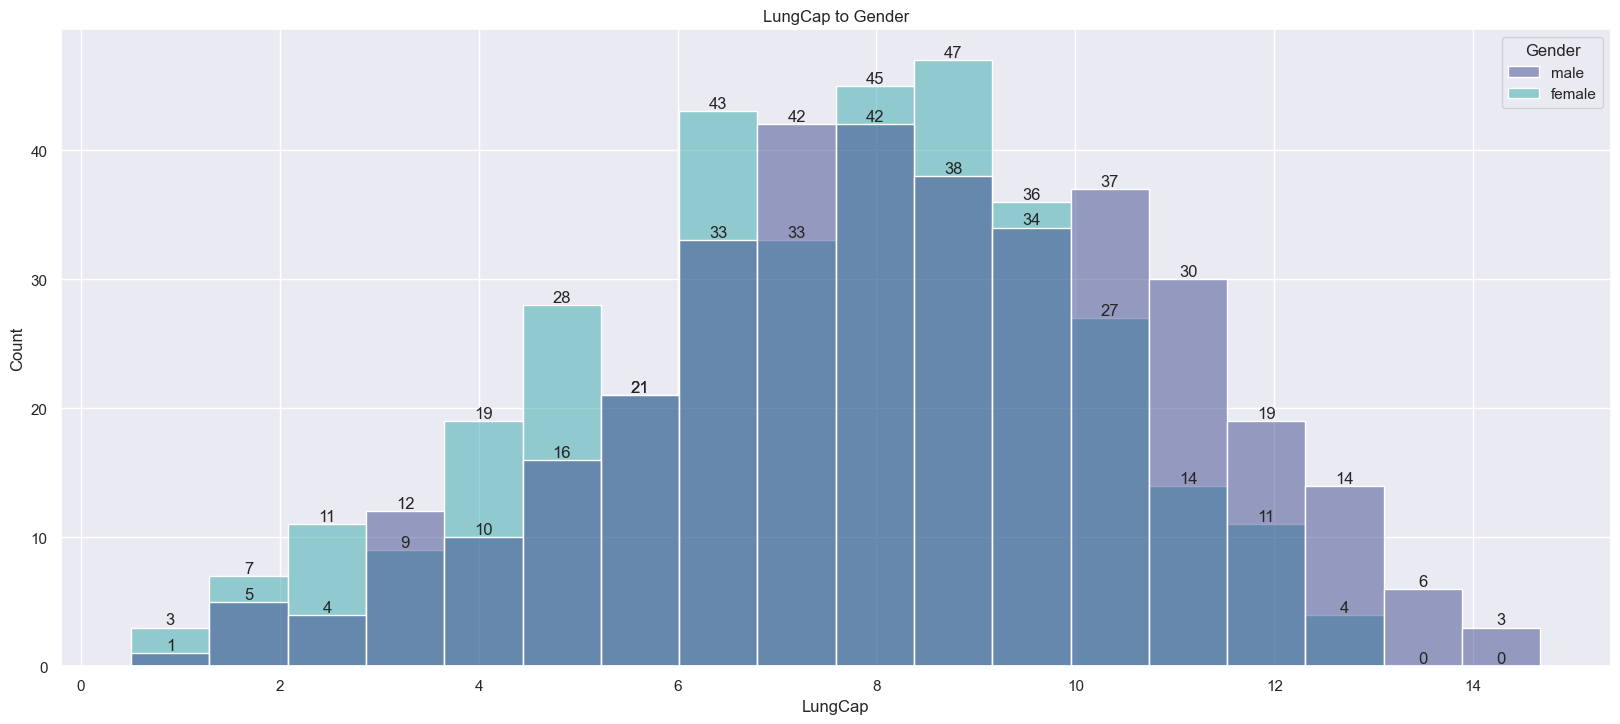

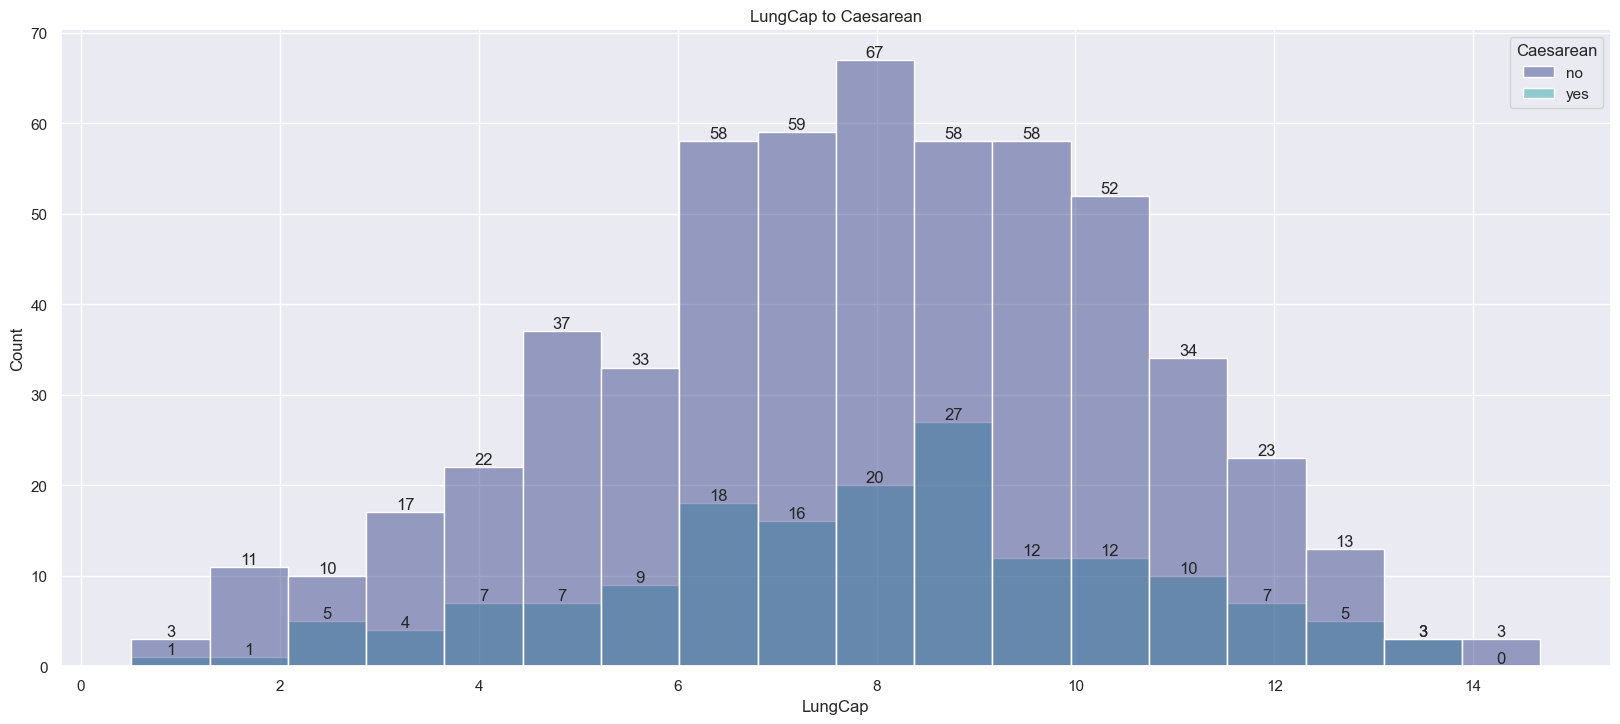

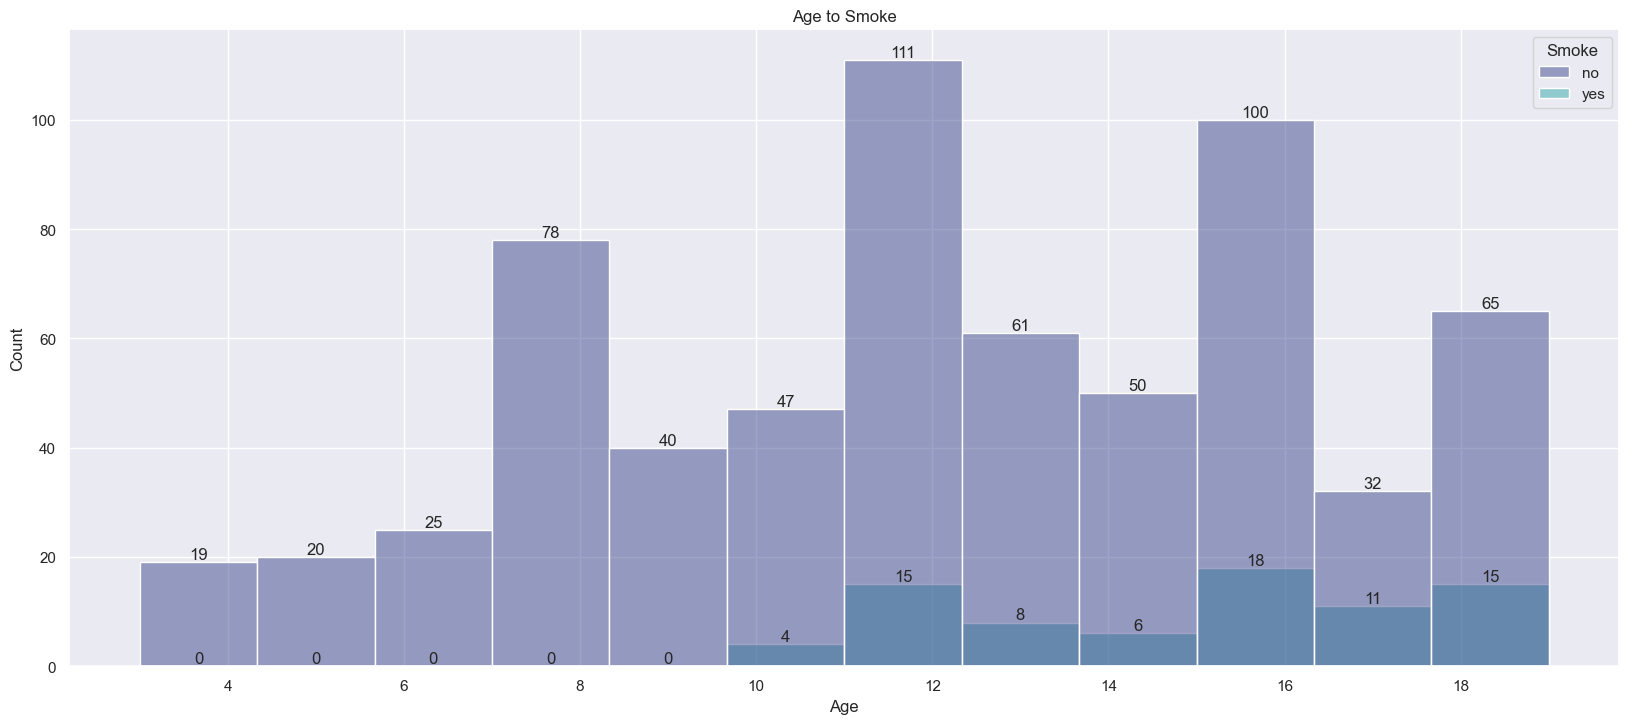

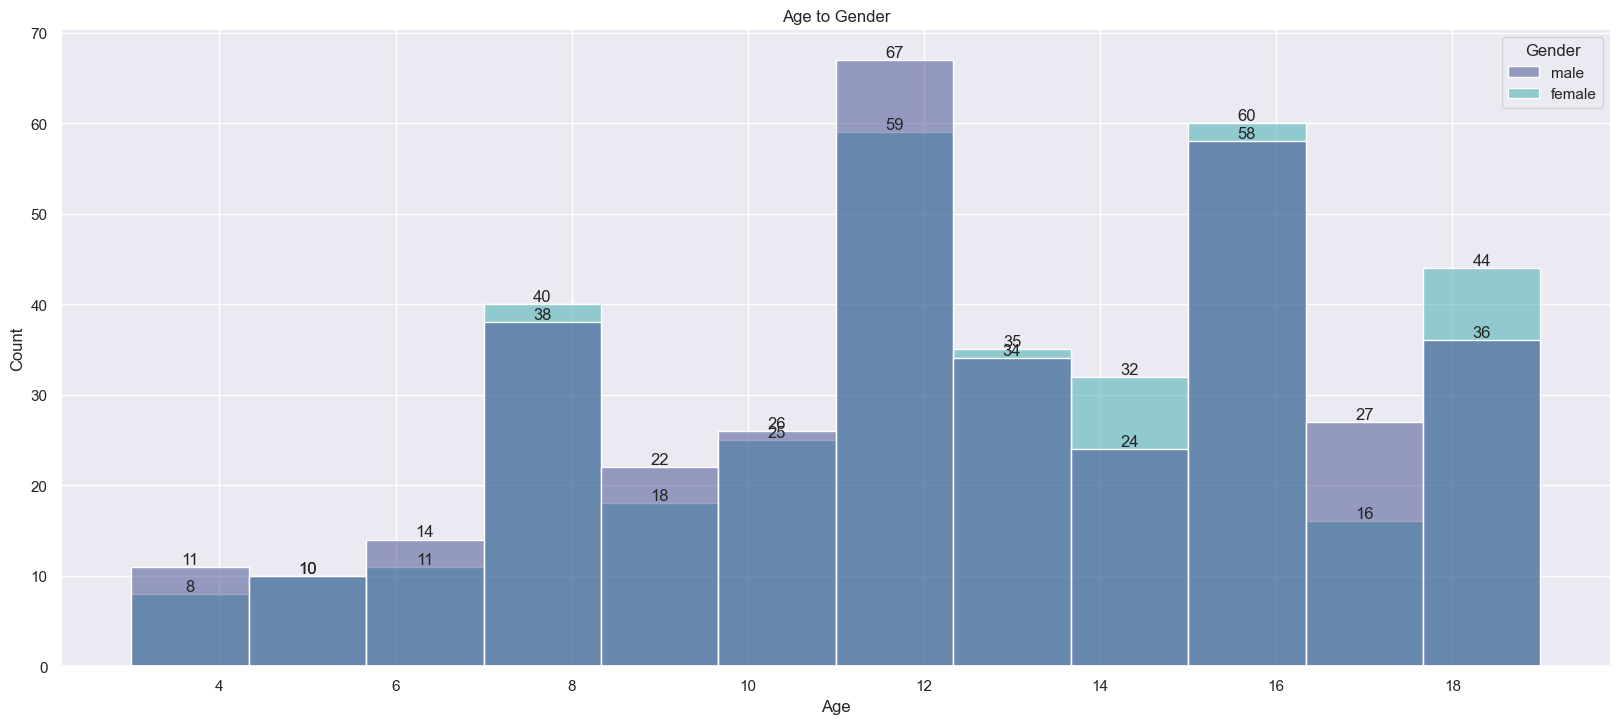

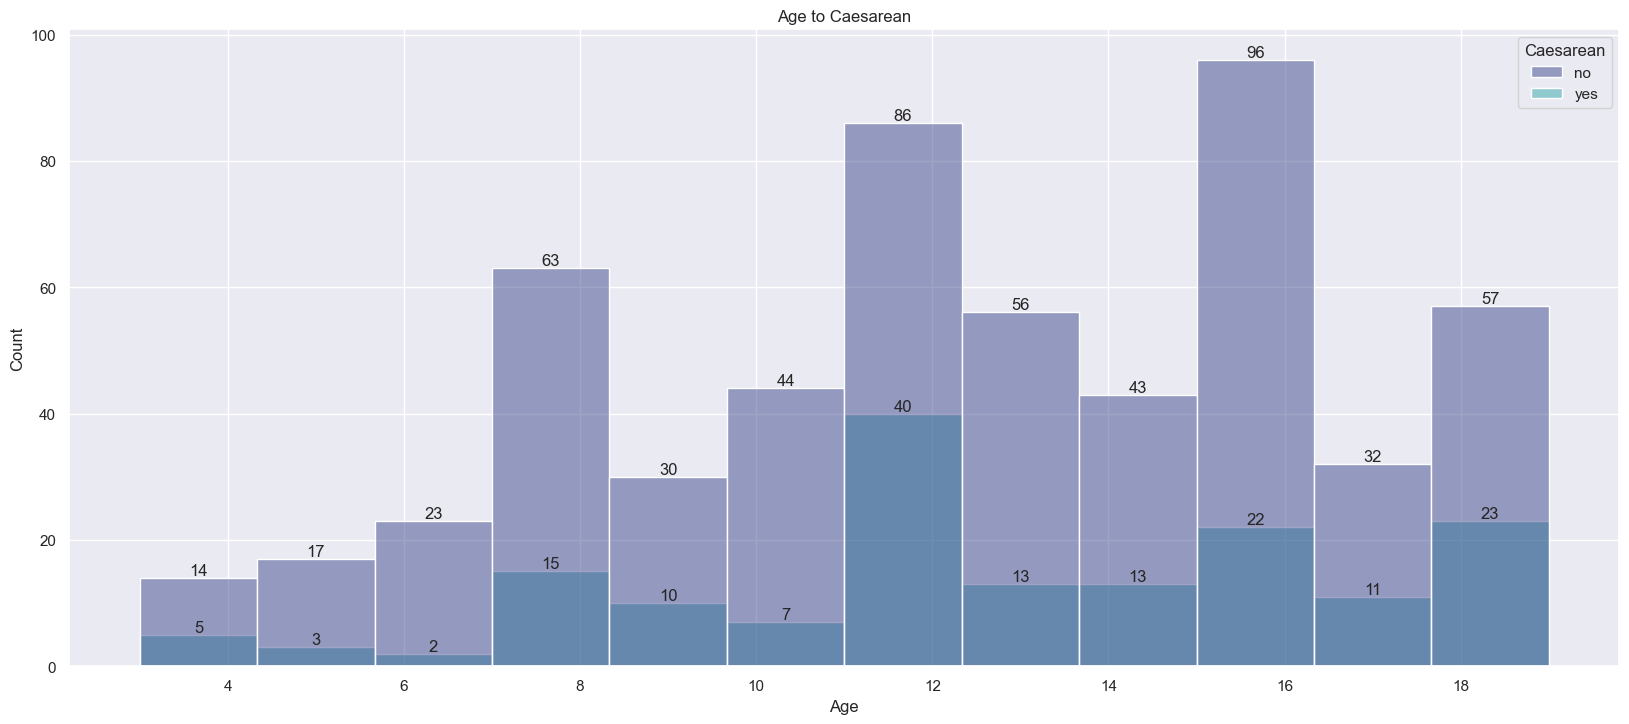

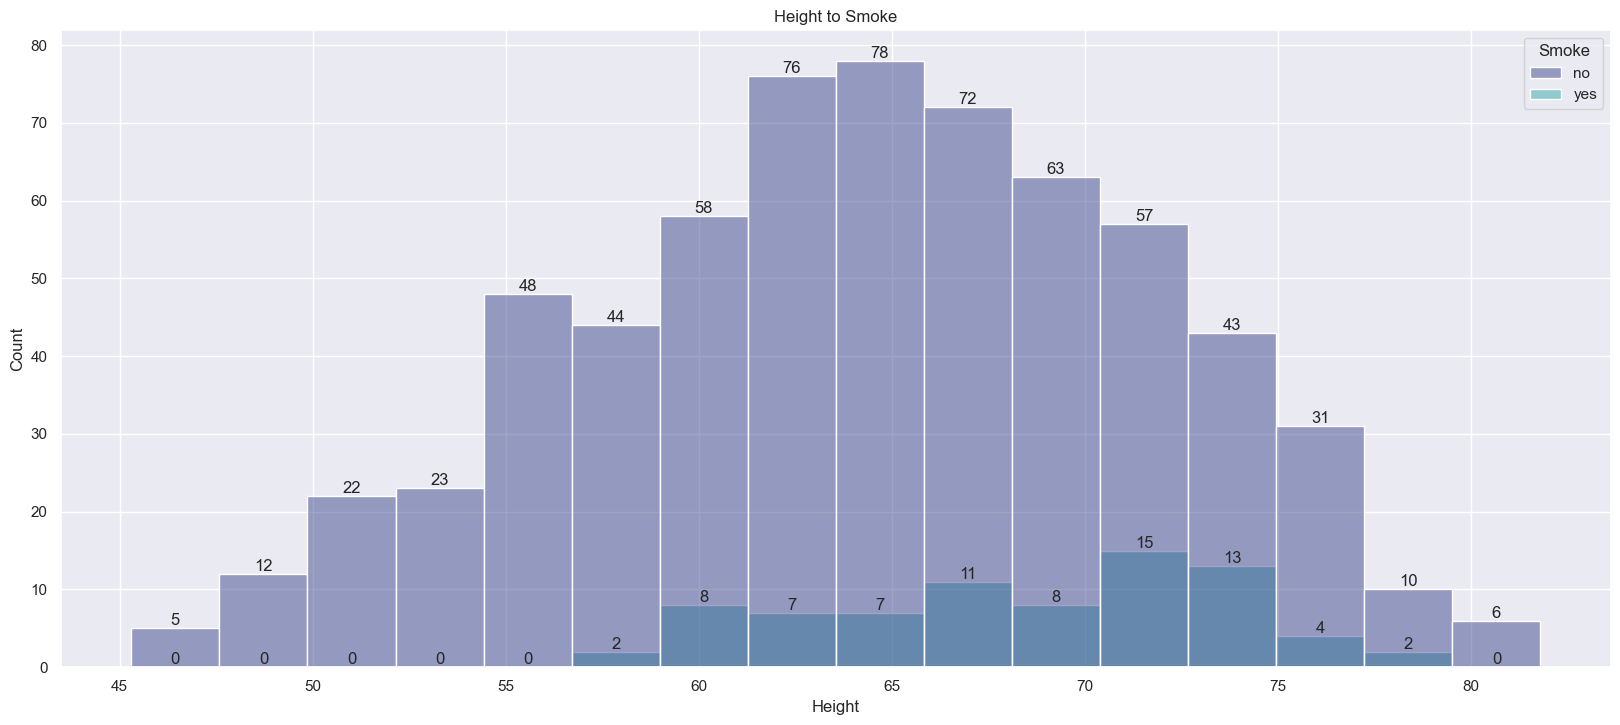

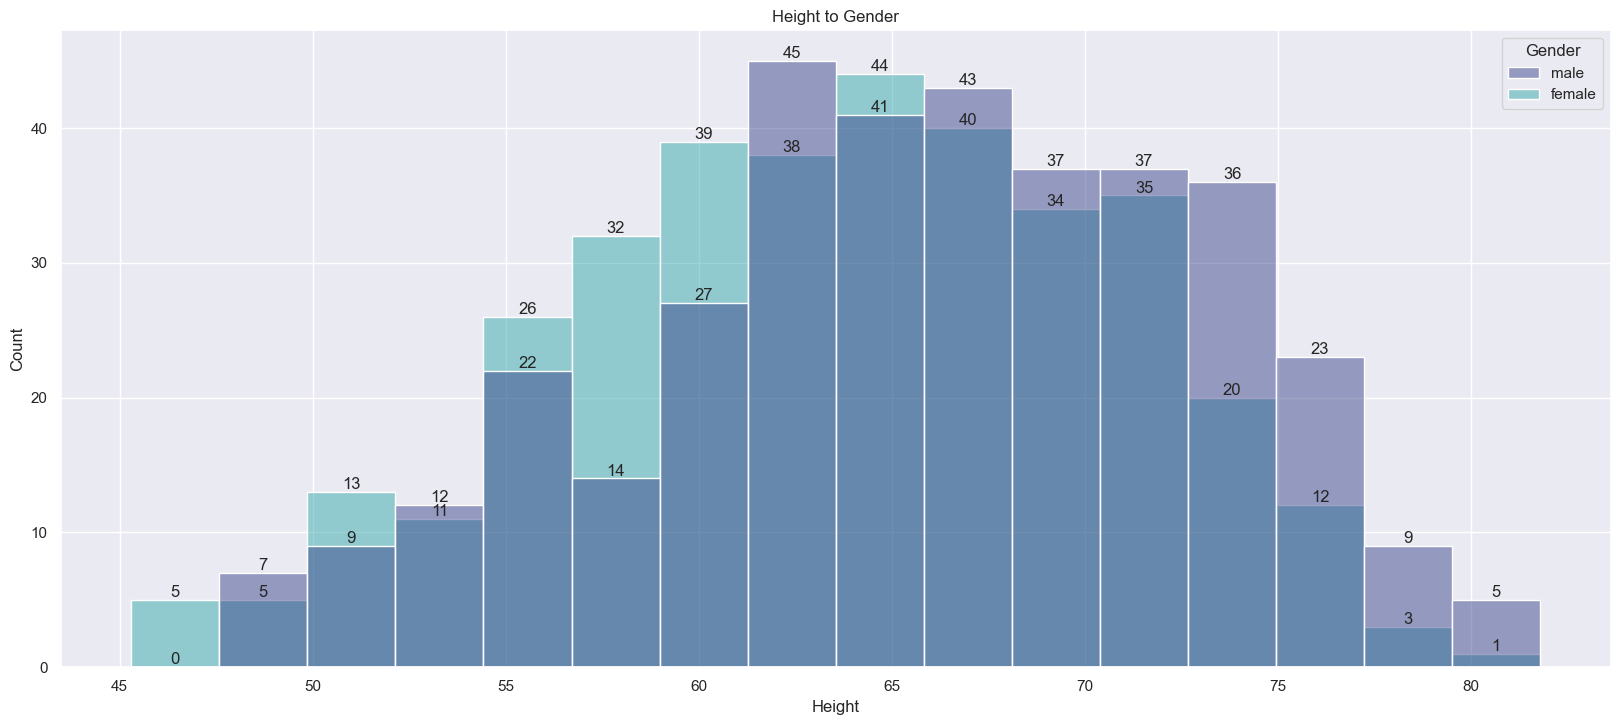

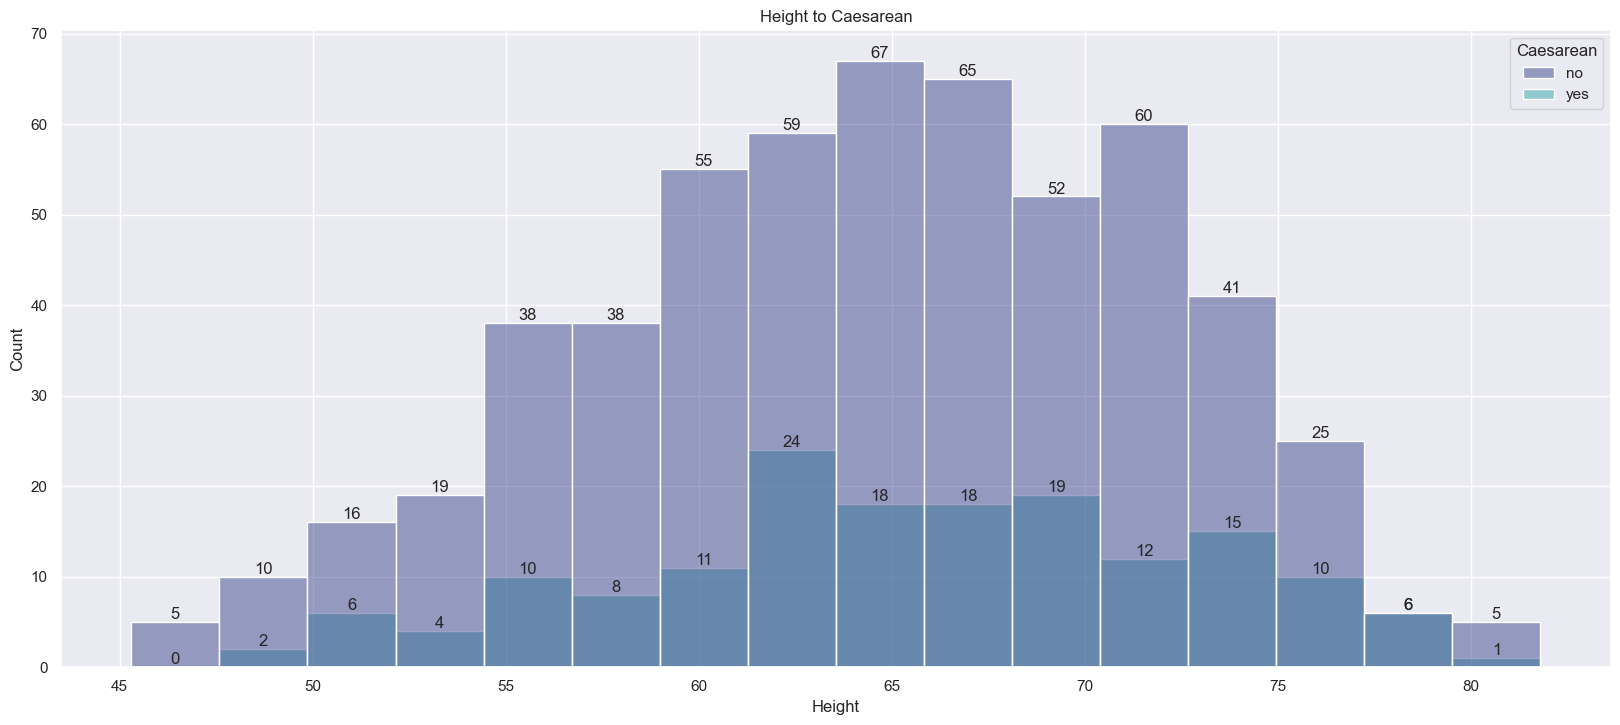

In [10]:
colsN = ['LungCap','Age','Height']
colsN2 = ['Smoke', 'Gender', 'Caesarean']
for val_a in colsN:
    for val_b in colsN2:
        plt.figure()
        figBar=sns.histplot(x=df[val_a], data=df, hue=df[val_b], palette='mako')
        for container in figBar.containers:
            figBar.bar_label(container)
        plt.title(f'{val_a} to {val_b}')